# What is Generalization ?

- In supervised learning, we build model on a dataset (seen data) and then be able to make accurate predictions on new data (unseen data) 
- Thus, we need to divide data into two set, training set and test set
- Taining set is used to fit the model and from test set we can infer the ML algorithm performance 
- When building any model, test data can’t get involved at all
- If a model is able to make accurate predictions on the unseen data, we say it is able to generalize from the training set to the test set


# Why generalization?

- We are interested in the accuracy of the prediction that we obtain when we apply our method to new unseen data
- In practice, We might try several different method
- No one method dominates all others over all possible data set
- We want to build an ML that is able to generalize as accurately as possible


# Underfitting and Overfitting

Underfitting terjadi ketika metode ML yang dibangun masih terlalu sederhana sedangkan overfitting terjadi ketika metode ML yang dibangun terlalu kompleks. 

<img src = 'recap.png' heigth= 300 width=600>   

A good model has slightly lower training error than test error

<img src = 'underover.png' heigth= 200 width=600>

<img src = 'underover2.png' heigth= 200 width=600>

# Library

In [110]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

# Undefitting and Overfitting : KNN

> ## Table Of Contents

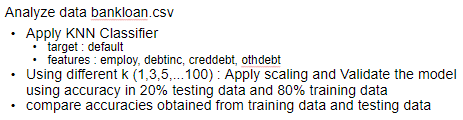

> ## Dataset : Bankloan Dataset

In [111]:
bankloan=pd.read_csv('bankloan.csv')

In [112]:
bankloan.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1
1,27,1,10,6,31,17.3,1.362202,4.000798,0
2,40,1,15,14,55,5.5,0.856075,2.168925,0
3,41,1,15,14,120,2.9,2.658720,0.821280,0
4,24,2,2,0,28,17.3,1.787436,3.056564,1


In [113]:
fitur=['employ','debtinc','creddebt','othdebt']
target=['default']

In [114]:
X=bankloan[fitur]
y=bankloan[target]

> ## Data Splitting

In [115]:
X_train, X_test,y_train, y_test = train_test_split(
    X,y,
    stratify=y,
    test_size= 0.2,
    random_state=2020
)

> ## Standardization Process

In [117]:
scaler= MinMaxScaler()
scaler.fit(X_train)
X_train_scaled= scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

> ## Selection process of Factor k

In [118]:
k = range(1,100,2)
testing_accuracies = []
training_accuracies = []
score = 0

for i in k:
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(X_train_scaled,y_train)

  y_predict_train = knn.predict(X_train_scaled)
  training_accuracies.append(accuracy_score(y_train,y_predict_train))

  y_predict_test = knn.predict(X_test_scaled)
  acc_score = accuracy_score(y_test,y_predict_test)
  testing_accuracies.append(acc_score)

  if score < acc_score:
    score = acc_score
    best_k = i

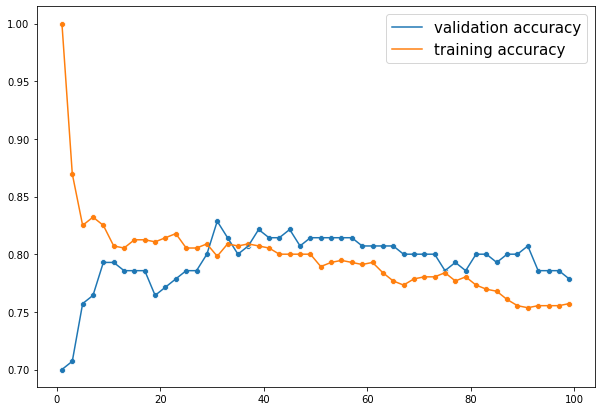

In [119]:
plt.figure(figsize = (10,7))
sns.lineplot(k,testing_accuracies)
sns.scatterplot(k,testing_accuracies)
sns.lineplot(k,training_accuracies)
sns.scatterplot(k,training_accuracies)
plt.legend(['validation accuracy','training accuracy'], fontsize = 15)
# plt.xticks(list(k))

In [67]:
print('best k:', best_k)
print('accuracy:', score)

best k: 31
accuracy: 0.8285714285714286


1. The best factor k for this case is 31 with 82.86 % accuracy
1. For k = 1, the KNN method achieve 100 accuracy in training set but very bad accuracy in validation set (overfitting)
1. For k below 31, the ML method is getting overfitting while for k greater than 31 the ML method is getting underfitting

# Model Complexity : Decision Tree

> ## Table Of Contents

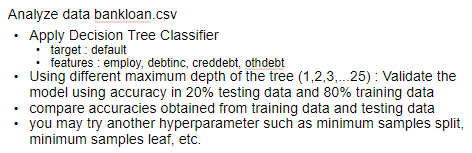

> ## Selection Process of Maximum Depth

In [121]:
depths = range(1,25)
testing_accuracies = []
training_accuracies = []
score = 0

for i in depths:
  tree = DecisionTreeClassifier(
      criterion = 'entropy',
      max_depth = i)
  tree.fit(X_train,y_train)

  y_predict_train = tree.predict(X_train)
  training_accuracies.append(accuracy_score(y_train,y_predict_train))

  y_predict_test = tree.predict(X_test)
  acc_score = accuracy_score(y_test,y_predict_test)
  testing_accuracies.append(acc_score)

  if score < acc_score:
    best_depth = i
    score = acc_score

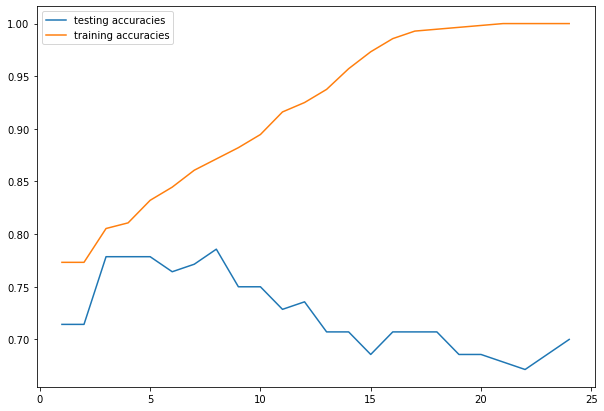

In [122]:
plt.figure(figsize=(10,7))
sns.lineplot(depths,testing_accuracies)
sns.lineplot(depths,training_accuracies)
plt.legend(['testing accuracies','training accuracies'])

In [70]:
print('best maximum depth:', best_depth)
print('accuracy:', score)

best maximum depth: 8
accuracy: 0.7857142857142857


1. The best maximum depth for this case is 8 with 78.57 % accuracy.
1. The deeper the tree, the ML method getting overfitting
1. when the max depth 25, the accuracy in training set almost 100% while in test set the accuracy is very bad.

Ada beberapa hyperparameter yang dapat digunakan untuk mengatur overfitting pada decision tree classifier seperti maximum depth, minimum samples split dan minimum samples leaf. 

> ## Exercise : Try different value of minimum samples split or minimum samples leaf

In [136]:
bankloan.shape

(700, 9)

In [129]:
min_samples_split = range(2,200)
testing_accuracies = []
training_accuracies = []
score = 0

for i in min_samples_split:
  tree = DecisionTreeClassifier(
      criterion = 'entropy',
      min_samples_split = i)
  tree.fit(X_train,y_train)

  y_predict_train = tree.predict(X_train)
  training_accuracies.append(accuracy_score(y_train,y_predict_train))

  y_predict_test = tree.predict(X_test)
  acc_score = accuracy_score(y_test,y_predict_test)
  testing_accuracies.append(acc_score)

  if score < acc_score:
    best_depth = i
    score = acc_score

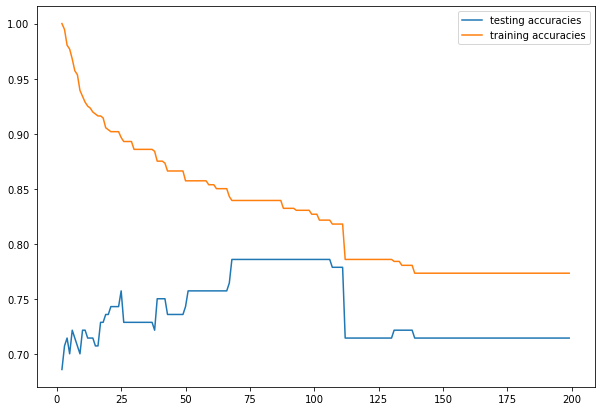

In [130]:
plt.figure(figsize=(10,7))
sns.lineplot(min_samples_split,testing_accuracies)
sns.lineplot(min_samples_split,training_accuracies)
plt.legend(['testing accuracies','training accuracies'])

In [131]:
print('best min_samples_split:', best_depth)
print('accuracy:', score)

best min_samples_split: 68
accuracy: 0.7857142857142857


In [132]:
min_samples_leaf = range(1,200)
testing_accuracies = []
training_accuracies = []
score = 0

for i in min_samples_leaf:
  tree = DecisionTreeClassifier(
      criterion = 'entropy',
      min_samples_leaf = i)
  tree.fit(X_train,y_train)

  y_predict_train = tree.predict(X_train)
  training_accuracies.append(accuracy_score(y_train,y_predict_train))

  y_predict_test = tree.predict(X_test)
  acc_score = accuracy_score(y_test,y_predict_test)
  testing_accuracies.append(acc_score)

  if score < acc_score:
    best_depth = i
    score = acc_score

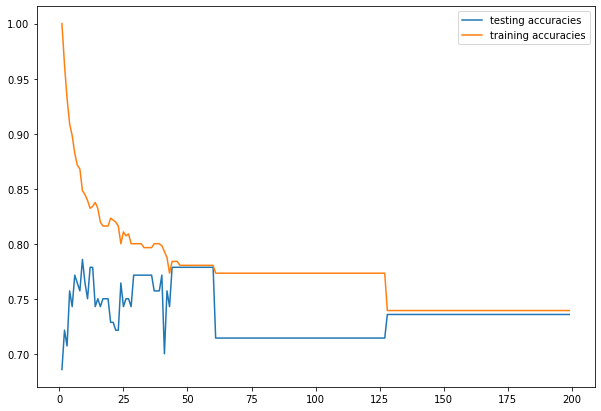

In [134]:
plt.figure(figsize=(10,7))
sns.lineplot(min_samples_leaf,testing_accuracies)
sns.lineplot(min_samples_leaf,training_accuracies)
plt.legend(['testing accuracies','training accuracies'])

In [135]:
print('best min_samples_leaf:', best_depth)
print('accuracy:', score)

best min_samples_leaf: 9
accuracy: 0.7857142857142857


# Model Complexity : Linear Model Regression

- Too many feature used in linear models makes model more complex and may leads to overfitting
- We can either use :
>- reduce the effect/magnitude of certain features (Ridge)
>- make zero effect/magnitude for certain features (Lasso)
- Ridge or Lasso can be used as a solution to multicollinearity
- Which one to use ?
>- as the simplest way, you can directly check the performance on test data


> ## Data

In [137]:
boston= load_boston()

In [138]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [73]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [141]:
X=pd.DataFrame(data=boston['data'],columns=boston['feature_names'])
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [142]:
y=pd.Series(boston['target'])

In [143]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
dtype: float64

> ## Data Splitting

In [161]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.2, 
    random_state = 1899) # make the result consistent

> ## Ridge Regression

Dalam teknik ridge ada suatu besaran yang perlu kita pilih nilainya, yakni nilai alpha. Meningkatnya nilai alpha membuat nilai estimasi koefisien regresi mendekati nol serta menyebabkan kompleksitas model menurun.

In [162]:
hyperparam_c=[100000, 10000, 1000, 100, 10, 1, 0.1, 0.001]
testing_mse=[]
training_mse=[]
score=0

for i in range (len(hyperparam_c)):
    ridgereg= Ridge(alpha = hyperparam_c[i])
    ridgereg.fit(X_train,y_train)

    y_predict_train = ridgereg.predict(X_train)
    training_mse.append(mean_squared_error(y_train,y_predict_train))

    y_predict_test=ridgereg.predict(X_test)
    mse_score= mean_squared_error(y_test,y_predict_test)
    testing_mse.append(mse_score)

    if i==0:
        score=mse_score
        best_c=hyperparam_c[i]

    if score > mse_score:
        score = mse_score
        best_c = hyperparam_c[i]


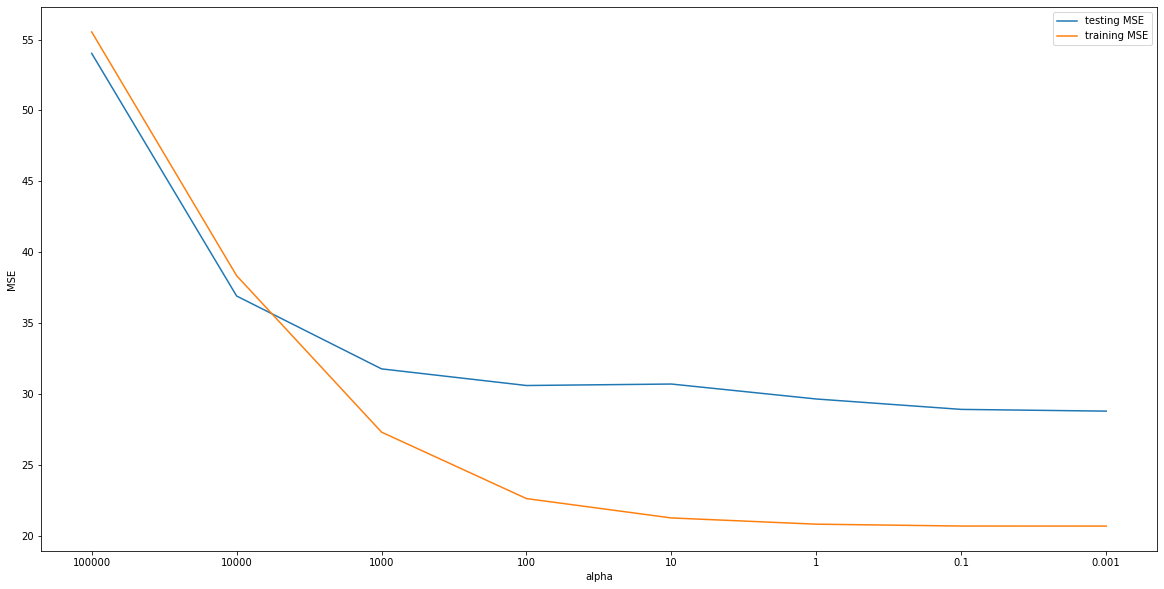

In [163]:
length = range (len(hyperparam_c))

plt.figure(figsize=(20,10))
sns.lineplot(length, testing_mse)
sns.lineplot(length, training_mse)
plt.legend(['testing MSE', 'training MSE'])
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.xticks(length,hyperparam_c)
plt.show()

## MSE: Mean Squared Error

Mean or Average of the square of the difference between actual and estimated values  

<img src = 'https://cdn-media-1.freecodecamp.org/images/MNskFmGPKuQfMLdmpkT-X7-8w2cJXulP3683' heigth= 400 width=400>

MSE unit order is higher than the error unit as the error is squared. To get the same unit order, many times the square root of MSE is taken. It is called the Root Mean Squared Error (RMSE).  


<img src = 'mse.png' heigth= 400 width=400>

In [164]:
print('best c:', best_c)
print('mse:', score)

best c: 0.001
mse: 28.778402778052975


In [165]:
ridgereg=Ridge(alpha=best_c)
ridgereg.fit(X_train, y_train
)

Ridge(alpha=0.001)

In [166]:
y_reg_train = ridgereg.predict(X_train)
y_reg_test = ridgereg.predict(X_test)

In [167]:
coef_ridgereg = pd.DataFrame({
    'feature_names':list(X),
    'feature coef':ridgereg.coef_.flatten()
})

In [168]:
coef_ridgereg

,feature_names,feature coef
0,CRIM,-0.123098
1,ZN,0.027489
2,INDUS,0.040234
3,CHAS,1.676822
4,NOX,-14.800396
5,RM,4.324093
6,AGE,0.002115
7,DIS,-1.253837
8,RAD,0.328548
9,TAX,-0.014321


In [169]:
print('mse train:',mean_squared_error(y_train,y_reg_train))
print('mse test:',mean_squared_error(y_test,y_reg_test))

mse train: 20.664301374310284
mse test: 28.778402778052975


1. When alpha set to high value the model is very underfitting because both mse in training set and test set are large and it also means that the model is too simple
1. lower alpha can decrese the mse for both training set  and test set until mse in training slighly lower than mse in test set
1. the best alpha for this case is 0.001 with 28.778 mse

> ## Lasso Regression

Sedangkan dalam teknik lasso, meningkatnya alpha menyebabkan lebih banyak fitur yang memiliki magnitude bernilai 0. Artinya, kompleksitas modelnya menurun atau model menjadi lebih sederhana. 


In [170]:
hyperparam_c = [100000, 10000, 1000, 100, 10, 1, 0.1, 0.001]
testing_mse = []
training_mse = []
score = 0

for i in range (len(hyperparam_c)):
  lassoreg = Lasso(alpha = hyperparam_c[i])
  lassoreg.fit(X_train,y_train)

  y_predict_train = lassoreg.predict(X_train)
  training_mse.append(mean_squared_error(y_train,y_predict_train))

  y_predict_test = lassoreg.predict(X_test)
  mse_score = mean_squared_error(y_test,y_predict_test)
  testing_mse.append(mse_score)

  if i==0:
      score=mse_score
      best_c=hyperparam_c[i]
        
  if score > mse_score:
      score = mse_score
      best_c = hyperparam_c[i]

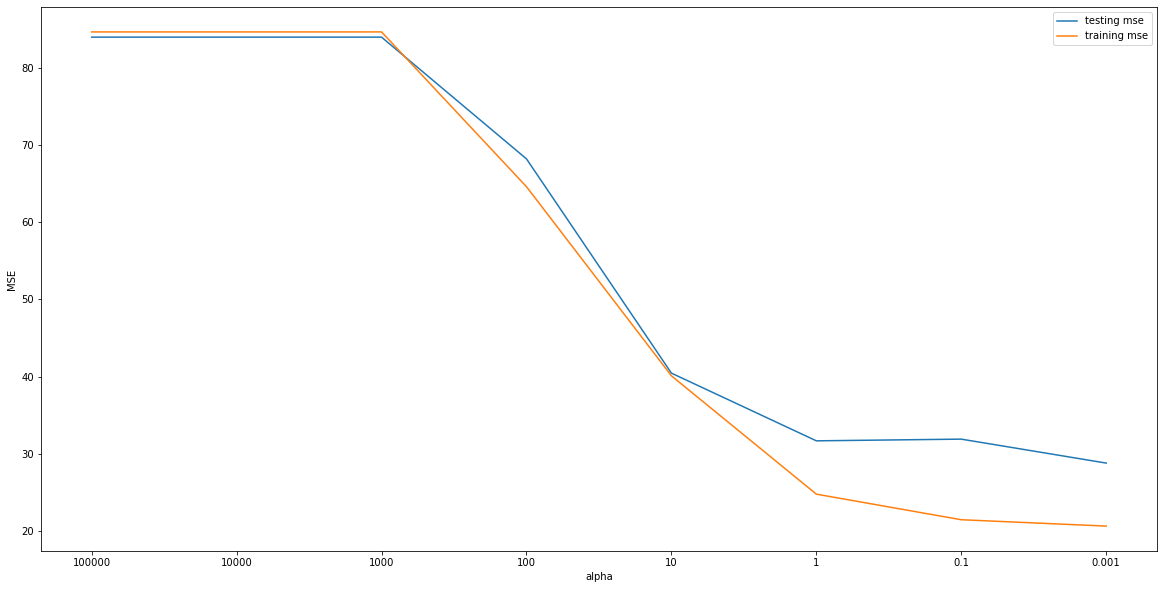

In [171]:
length = range(len(hyperparam_c))

plt.figure(figsize = (20,10))
sns.lineplot(length,testing_mse)
sns.lineplot(length,training_mse)
plt.legend(['testing mse','training mse'])
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.xticks(length,hyperparam_c)
plt.show()

In [172]:
print('best c:', best_c)
print('mse:', score)

best c: 0.001
mse: 28.820511284098718


In [173]:
lassoreg = Lasso(alpha=best_c) 
lassoreg.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [174]:
y_reg_train = lassoreg.predict(X_train)
y_reg_test = lassoreg.predict(X_test)

In [175]:
coef_lassoreg = pd.DataFrame({
    'feature_names':list(X),
    'feature coef':lassoreg.coef_
})

In [177]:
coef_ridgereg

,feature_names,feature coef
0,CRIM,-0.123098
1,ZN,0.027489
2,INDUS,0.040234
3,CHAS,1.676822
4,NOX,-14.800396
5,RM,4.324093
6,AGE,0.002115
7,DIS,-1.253837
8,RAD,0.328548
9,TAX,-0.014321


In [176]:
coef_lassoreg

,feature_names,feature coef
0,CRIM,-0.122920
1,ZN,0.027515
2,INDUS,0.038746
3,CHAS,1.655566
4,NOX,-14.470963
5,RM,4.324770
6,AGE,0.001868
7,DIS,-1.248666
8,RAD,0.327883
9,TAX,-0.014347


In [ ]:
print('mse train:',mean_squared_error(y_train,y_reg_train))
print('mse test:',mean_squared_error(y_test,y_reg_test))

mse train: 20.664674253173075
mse test: 28.82051128409872


1. When alpha set to high value the model is very underfitting becasue both mse in training set and test set are large and it also means that the model is too simple
1. lower alpha can decrese the mse for both training set  and test set until mse in training slighly lower than mse in test set
1. the best alpha for this case is 0.001 with 28.8205 mse

## Further reading

https://towardsdatascience.com/what-are-overfitting-and-underfitting-in-machine-learning-a96b30864690  
https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b  
https://towardsdatascience.com/https-medium-com-chayankathuria-regression-why-mean-square-error-a8cad2a1c96f  
https://www.mygreatlearning.com/blog/mean-square-error-explained/

In [179]:
df=pd.read_csv("Admission_Predict.csv")

In [180]:
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

## Exercise:

Use Ridge Regression and Lasso Regression with different alphas on Admission_predict.csv.  
What is the best alphas for each model? How does the preformance of the models compared with each other?